In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly. graph_objects as go


In [6]:
df=pd.read_csv('startup.csv')
df

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04
5,5,131877.00,99814.81,362861.46,New York,156991.22
6,6,134615.56,147198.97,127716.92,California,156122.61
7,7,130298.23,145530.16,323876.78,Florida,155752.70
8,8,120542.62,148719.05,311613.39,New York,152211.87
9,9,123334.98,108679.27,304981.72,California,149760.06


In [11]:
x=df.drop("Profit",axis=1)
y=df["Profit"]
x=pd.get_dummies(x,drop_first=True)# loaded data

In [12]:
x=x.values
y=y.values.reshape(-1,1)
#converted to numpy

# step2:feature scaling
gradient descent willnot work well without feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
import numpy as np

In [22]:
class startupbro:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        
        
    def fit(self,x,y):
        
        m,n=x.shape
        
        x=np.c_[np.ones((m,1)),x]
        self.w = np.zeros((n + 1, 1))

        self.losses = []
        
        for i in range (self.epochs):
            
        
            y_pred= x@ self.w
            error=y_pred-y
        
            grad=(2/m)*(x.T @ error)
        
            self.w-= self.lr*grad
        
        
            loss=np.mean(error ** 2)
            self.losses.append(loss)
        
        
    def predict(self,x):
        
        m=x.shape[0]
        x=np.c_[np.ones((m,1)),x]
        return x@ self.w

        
        
    

# Train the model

In [23]:
model=startupbro(lr=0.01,epochs=1000)
model.fit(x_train,y_train)

# Evaluate the model

In [25]:
y_pred=model.predict(x_test)

mse=np.mean((y_test-y_pred)**2)

print("Test MSE:",mse)

Test MSE: 52919153.975720674


In [28]:
train_pred =    model.predict(x_train)
test_pred  =     model.predict(x_test)

train_mse  =     np.mean((y_train-train_pred)**2)
test_mse   =     np.mean((y_test-test_pred)**2)

print(train_mse,test_mse)

68100172.10441814 52919153.975720674


In [33]:
# y = df["Profit"].values.reshape(-1, 1)


In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3,include_bias=False)
x_poly=poly.fit_transform(x)

x_poly=StandardScaler().fit_transform(x_poly)


xtr,xte,ytr,yte=train_test_split(x_poly,y,test_size=0.2,random_state=42)

In [38]:
print(xtr.shape,ytr.shape)

(40, 83) (40, 1)


In [39]:
poly_model=startupbro(lr=0.01,epochs=2000)
poly_model.fit(xtr,ytr)

In [42]:
class ridgeregbro:
    def __init__(self,lr=0.01,epochs=2000,lam=1.0):
        self.lr=lr
        self.epochs=epochs
        self.lam=lam
    def fit(self,x,y):
        
        m,n=x.shape
        x=np.c_[np.ones((m,1)),x]
        
        self.w=np.zeros((n+1,1))
        self.losses=[]
        
        
        for i in range(self.epochs):
            
            y_pred=x @ self.w
            error=y_pred-y
            
            grad=(2/m)*(x.T @error)
            grad[1:]+=2*self.lam*self.w[1:]
            
            self.w-=self.lr*grad
            
            loss=np.mean(error**2)+self.lam*np.sum(self.w[1:]**2)
            
            self.losses.append(loss)
            
    def predict (self,x):
        m=x.shape[0]
        x=np.c_[np.ones((m,1)),x]
        
        return x @ self.w
        
       
    

In [43]:
ridge_model=ridgeregbro(lr=0.01,epochs=2000,lam=10)
ridge_model.fit(xtr,ytr)

In [45]:
ytr_pred=ridge_model.predict(xtr)
yte_pred=ridge_model.predict(xte)

train_mse_ridge=np.mean((ytr-ytr_pred)**2)
test_mse_ridge=np.mean((yte-yte_pred)**2)

In [49]:
print("Ridge train MSE:", train_mse_ridge)
print("Ridge test MSE: " ,test_mse_ridge)

Ridge train MSE: 370107983.0579435
Ridge test MSE:  157532295.47205144


# ploting

Text(0.5, 1.0, 'ridge_reg train loss')

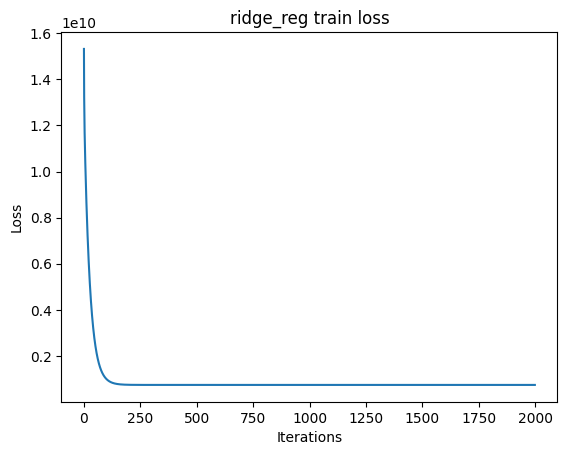

In [51]:
plt.plot(ridge_model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("ridge_reg train loss")


In [53]:
from sklearn.linear_model import Ridge

ridge_sk=Ridge(alpha=10)
ridge_sk.fit(xtr,ytr)

ytr_pred_sk=ridge_sk.predict(xtr)
yte_pred_sk=ridge_sk.predict(xte)


print("Sklearn Ridge Train Mse",np.mean((ytr- ytr_pred_sk)**2))

print("Sklearn Ridge Test Mse ",np.mean((yte- yte_pred_sk)**2))

Sklearn Ridge Train Mse 3329264735.5931025
Sklearn Ridge Test Mse  1885750205.189116


In [59]:
alphas = [0.01, 0.1, 1, 10, 50, 100, 500, 1000]


train_errors = []
test_errors = []


for a in alphas:
    model = Ridge(alpha=a)
    model.fit(xtr, ytr)

    ytr_pred = model.predict(xtr)
    yte_pred = model.predict(xte)

    train_mse = np.mean((ytr - ytr_pred) ** 2)
    test_mse  = np.mean((yte - yte_pred) ** 2)

    train_errors.append(train_mse)
    test_errors.append(test_mse)



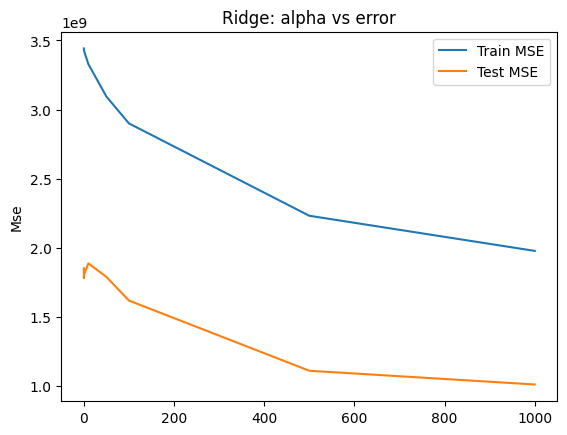

In [63]:
plt.plot(alphas, train_errors, label="Train MSE")
plt.plot(alphas, test_errors, label="Test MSE")
plt.xscale=("log")
plt.xlabel=("Alpha (a)")
plt.ylabel("Mse")
plt.title("Ridge: alpha vs error")
plt.legend()
plt.show()
